# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import mysql.connector


# Create connection


In [2]:
mydb = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'password',
    database = 'superstoredb'
)

## Create a function to write SQL Query and display the result as DataFrame


In [3]:
mycursor = mydb.cursor()

# create function
def sql(yourQuery):
    mycursor.execute(yourQuery)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

In [4]:
sql(
    '''
    SELECT *
    FROM superstore
    LIMIT 5;
    '''
)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_Name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### we create new column named sales_lead. We used LEAD to show next sales value in sales_lead

In [5]:
sql(
    '''
    SELECT 
        order_id, order_date, segment, state, sales,
        LEAD(sales) OVER (PARTITION BY segment ORDER BY order_id) sales_lead
    FROM superstoredb.superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstoredb.superstore) AND 
                            (SELECT MAX(order_date) FROM superstoredb.superstore);
    '''
).head(10)

,order_id,order_date,segment,state,sales,sales_lead
0,CA-2014-100006,2014-09-07,Consumer,New York,377.970,3.928
1,CA-2014-100328,2014-01-28,Consumer,New York,3.928,14.620
2,CA-2014-100391,2014-05-25,Consumer,New York,14.620,227.976
3,CA-2014-100678,2014-04-18,Consumer,Texas,227.976,149.352
4,CA-2014-100678,2014-04-18,Consumer,Texas,149.352,317.058
5,CA-2014-100678,2014-04-18,Consumer,Texas,317.058,2.688
6,CA-2014-100678,2014-04-18,Consumer,Texas,2.688,99.980
7,CA-2014-100706,2014-12-16,Consumer,Virginia,99.980,29.460
8,CA-2014-100706,2014-12-16,Consumer,Virginia,29.460,18.750
9,CA-2014-100860,2014-03-26,Consumer,California,18.750,239.970


####  we create new column named sales_lag. We used LAG to show previous sales value in sales_lag

In [6]:
sql(
    '''
    SELECT 
        order_id, order_date, segment, state, sales,
        LAG(sales) OVER (PARTITION BY segment ORDER BY order_id) sales_lag
    FROM superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                            (SELECT MAX(order_date) FROM superstore);
    '''
).head(10)

,order_id,order_date,segment,state,sales,sales_lag
0,CA-2014-100006,2014-09-07,Consumer,New York,377.970,NaN
1,CA-2014-100328,2014-01-28,Consumer,New York,3.928,377.970
2,CA-2014-100391,2014-05-25,Consumer,New York,14.620,3.928
3,CA-2014-100678,2014-04-18,Consumer,Texas,227.976,14.620
4,CA-2014-100678,2014-04-18,Consumer,Texas,149.352,227.976
5,CA-2014-100678,2014-04-18,Consumer,Texas,317.058,149.352
6,CA-2014-100678,2014-04-18,Consumer,Texas,2.688,317.058
7,CA-2014-100706,2014-12-16,Consumer,Virginia,99.980,2.688
8,CA-2014-100706,2014-12-16,Consumer,Virginia,29.460,99.980
9,CA-2014-100860,2014-03-26,Consumer,California,18.750,29.460


#### we add new column named sales_rank to create ranking from biggest sales (descending)

In [7]:

sql(
    '''
    SELECT 
        order_id, order_date, segment, state, sales,
        RANK() OVER (PARTITION BY segment ORDER BY sales DESC) sales_rank
    FROM superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                            (SELECT MAX(order_date) FROM superstore);
    '''
)

,order_id,order_date,segment,state,sales,sales_rank
0,CA-2017-140151,2017-03-23,Consumer,Washington,13999.960,1
1,CA-2017-166709,2017-11-17,Consumer,Delaware,10499.970,2
2,CA-2016-117121,2016-12-17,Consumer,Michigan,9892.740,3
3,CA-2014-116904,2014-09-23,Consumer,Minnesota,9449.950,4
4,CA-2016-158841,2016-02-02,Consumer,Virginia,8749.950,5
...,...,...,...,...,...,...
9989,CA-2017-117702,2017-11-28,Home Office,Maryland,1.640,1779
9990,CA-2016-120824,2016-06-12,Home Office,Texas,1.524,1780
9991,CA-2017-121160,2017-11-04,Home Office,Texas,1.408,1781
9992,CA-2016-114748,2016-10-09,Home Office,Arizona,1.408,1781


#### PERCENT_RANK calculates the percentile ranking of rows in a result set

In [8]:
sql(
    '''
    SELECT 
        order_id, order_date, segment, region, sales,
        PERCENT_RANK() OVER (PARTITION BY region ORDER BY sales DESC) sales_rank
    FROM superstore
    WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                            (SELECT MAX(order_date) FROM superstore);
    '''
)

,order_id,order_date,segment,region,sales,sales_rank
0,CA-2016-118689,2016-10-02,Corporate,Central,17499.950,0.000000
1,CA-2016-117121,2016-12-17,Consumer,Central,9892.740,0.000431
2,CA-2014-116904,2014-09-23,Consumer,Central,9449.950,0.000861
3,CA-2014-139892,2014-09-08,Consumer,Central,8159.952,0.001292
4,CA-2017-138289,2017-01-16,Consumer,Central,5443.960,0.001723
...,...,...,...,...,...,...
9989,CA-2014-143168,2014-10-18,Consumer,West,1.344,0.998751
9990,US-2017-162068,2017-12-28,Corporate,West,1.188,0.999063
9991,CA-2015-106978,2015-09-28,Consumer,West,1.080,0.999375
9992,US-2017-100209,2017-07-09,Consumer,West,1.080,0.999375


# Time Series Analysis

### Monthly Sales Average using DATE_FORMAT Function

In [9]:
sql(
    '''
    WITH monthly_avg_sales AS
    (SELECT 
        date_format(order_date, '%Y-%m-01') order_month,
        avg(sales) avg_sales
    FROM 
        superstore
    GROUP BY 
        order_month
    )
    SELECT order_month, avg_sales
    FROM monthly_avg_sales
    ORDER BY order_month;
    '''
).head(10)

,order_month,avg_sales
0,2014-01-01,180.213861
1,2014-02-01,98.258522
2,2014-03-01,354.719803
3,2014-04-01,209.595148
4,2014-05-01,193.838418
5,2014-06-01,256.260204
6,2014-07-01,237.387364
7,2014-08-01,182.414827
8,2014-09-01,305.139369
9,2014-10-01,197.820082


### Monthly Sales Average using EXTRACT Function

In [10]:
sql(
    '''
    WITH monthly_avg_sales AS
        (SELECT
            EXTRACT(YEAR_MONTH FROM order_date) order_month,
            avg(sales) avg_sales
        FROM 
            superstore
        GROUP BY
            order_month
        )
    SELECT order_month, avg_sales
    FROM monthly_avg_sales
    ORDER BY order_month;
    '''
).head(10)

,order_month,avg_sales
0,201401,180.213861
1,201402,98.258522
2,201403,354.719803
3,201404,209.595148
4,201405,193.838418
5,201406,256.260204
6,201407,237.387364
7,201408,182.414827
8,201409,305.139369
9,201410,197.820082


### Daily Sales Average

In [11]:
sql(
    '''
    WITH daily_avg_sales AS
        (SELECT
            date_format(order_date, '%Y-%m-%d') order_day,
            avg(sales) avg_sales
        FROM 
            superstore
        GROUP BY
            order_day
        )
    SELECT order_day, avg_sales
    FROM daily_avg_sales
    ORDER BY order_day;
    '''
)

,order_day,avg_sales
0,2014-01-03,16.448000
1,2014-01-04,96.020000
2,2014-01-05,19.536000
3,2014-01-06,489.677778
4,2014-01-07,43.579000
...,...,...
1232,2017-12-26,203.648500
1233,2017-12-27,88.818000
1234,2017-12-28,87.228989
1235,2017-12-29,242.961167


### Sales Average from 1st -31 every month

In [12]:
sql(
    '''
    WITH daily_avg_sales AS
        (SELECT
            DAY(order_date) order_day,
            avg(sales) avg_sales
        FROM 
            superstore
        GROUP BY
            order_day
        )
    SELECT order_day, avg_sales
    FROM daily_avg_sales
    ORDER BY order_day;
    '''
)

,order_day,avg_sales
0,1,283.455687
1,2,277.411937
2,3,198.136780
3,4,221.306295
4,5,176.285543
5,6,187.041607
6,7,210.103713
7,8,285.331322
8,9,193.553387
9,10,209.979470


# Calculating Aggregates Over Windows Function

### Average Daily Profit using Aggregate Window Function

In [13]:
sql(
    '''
    SELECT  order_id, 
        order_date,
        category,
        daily_avg_profit
FROM (
    SELECT  order_id, 
            DATE_FORMAT(order_date, '%Y-%m-%d') AS order_date, 
            category,
            AVG(profit) OVER (PARTITION BY order_date) AS daily_avg_profit,
            profit
    FROM superstore
) AS subquery
WHERE order_date BETWEEN (SELECT MIN(order_date) FROM superstore) AND 
                        (SELECT MAX(order_date) FROM superstore)
GROUP BY order_date, order_id, category, daily_avg_profit;


    '''
)

,order_id,order_date,category,daily_avg_profit
0,CA-2014-103800,2014-01-03,Office Supplies,5.551200
1,CA-2014-112326,2014-01-04,Office Supplies,-21.996700
2,CA-2014-141817,2014-01-05,Office Supplies,4.884000
3,CA-2014-130813,2014-01-06,Office Supplies,150.894711
4,CA-2014-106054,2014-01-06,Office Supplies,150.894711
...,...,...,...,...
7045,CA-2017-143259,2017-12-30,Furniture,14.505214
7046,CA-2017-143259,2017-12-30,Technology,14.505214
7047,CA-2017-143259,2017-12-30,Office Supplies,14.505214
7048,CA-2017-115427,2017-12-30,Office Supplies,14.505214


##  Previous Day Comparison

### Comparing Average Discount with Previous Day

In [14]:
sql(
    '''
    WITH daily_avg_discount AS 
        (SELECT DATE_FORMAT(order_date, '%Y-%m-%d') order_day,
                avg(discount) avg_discount
        FROM superstore
        GROUP BY order_day
        )
    SELECT order_day, avg_discount,
            (SELECT avg_discount
            FROM daily_avg_discount data2
            WHERE date(data2.order_day) = date(data1.order_day) - 1) avg_discount_previous_day
    FROM
        daily_avg_discount data1
    ORDER BY 
        order_day;
    '''
)

,order_day,avg_discount,avg_discount_previous_day
0,2014-01-03,0.200000,NaN
1,2014-01-04,0.400000,0.200000
2,2014-01-05,0.200000,0.400000
3,2014-01-06,0.000000,0.200000
4,2014-01-07,0.700000,0.000000
...,...,...,...
1232,2017-12-26,0.225000,0.243478
1233,2017-12-27,0.300000,0.225000
1234,2017-12-28,0.216842,0.300000
1235,2017-12-29,0.033333,0.216842


### Comparing Average Sales with Previous Day


In [15]:
sql(
    '''
    WITH daily_total_sales AS 
        (SELECT DATE_FORMAT(order_date, '%Y-%m-%d') order_day,
                SUM(sales) total_sales
        FROM superstore
        GROUP BY order_day
        )
    SELECT order_day, total_sales,
            (SELECT total_sales
             FROM daily_total_sales data2
             WHERE date(data2.order_day) = date(data1.order_day) - 1) total_sales_previous_day
    FROM
        daily_total_sales data1
    ORDER BY 
        order_day;
    '''
)

,order_day,total_sales,total_sales_previous_day
0,2014-01-03,16.4480,NaN
1,2014-01-04,288.0600,16.4480
2,2014-01-05,19.5360,288.0600
3,2014-01-06,4407.1000,19.5360
4,2014-01-07,87.1580,4407.1000
...,...,...,...
1232,2017-12-26,814.5940,2698.9270
1233,2017-12-27,177.6360,814.5940
1234,2017-12-28,1657.3508,177.6360
1235,2017-12-29,2915.5340,1657.3508


# Moving Averages


In [16]:
#This query below, we create new columns: 
#Cumulative Sum Profit and Cumulative Average Profit using Moving Overage. 
#As we see in this query, Moving Average using Aggregate Window Function (SUM/AVG + OVER)

In [17]:
sql(
    '''
    SELECT
        Order_Date,
        Product_ID, 
        Sub_Category,
        Quantity,
        ROUND(Profit, 2) AS Profit,
        ROUND(SUM(Profit) OVER(ORDER BY Order_Date ROWS BETWEEN UNBOUNDED PRECEDING AND
                                                        CURRENT ROW), 2) AS Cummulative_SUM_Profit,
        ROUND(AVG(Profit) OVER(ORDER BY Order_Date ROWS BETWEEN UNBOUNDED PRECEDING AND
                                                        CURRENT ROW), 2) AS Cummulative_AVG_Profit
    FROM superstore;
    '''
)

,Order_Date,Product_ID,Sub_Category,Quantity,Profit,Cummulative_SUM_Profit,Cummulative_AVG_Profit
0,2014-01-03,OFF-PA-10000174,Paper,2,5.55,5.55,5.55
1,2014-01-04,OFF-LA-10003223,Labels,3,4.27,9.82,4.91
2,2014-01-04,OFF-ST-10002743,Storage,3,-64.77,-54.95,-18.32
3,2014-01-04,OFF-BI-10004094,Binders,2,-5.49,-60.44,-15.11
4,2014-01-05,OFF-AR-10003478,Art,3,4.88,-55.55,-11.11
...,...,...,...,...,...,...,...
9989,2017-12-30,TEC-PH-10004774,Phones,7,2.73,286366.84,28.67
9990,2017-12-30,OFF-BI-10003684,Binders,3,19.79,286386.63,28.66
9991,2017-12-30,OFF-BI-10002103,Binders,2,4.52,286391.15,28.66
9992,2017-12-30,OFF-BI-10004632,Binders,2,6.48,286397.63,28.66


# Forecasting with Linear Regression

## Linear Regression Formula: Y=mx+c

### c = intercept
### m = slope


In [18]:
#discount is feature or x variable.
#Profit is target value or y variable

In [19]:
# x_bar & y_bar
sql(
    '''
    SELECT
        discount, AVG(discount) OVER() as x_bar,
        profit, AVG(profit) OVER() as y_bar
    FROM 
        superstore;

    '''
)

,discount,x_bar,profit,y_bar
0,0.00,0.156203,41.9136,28.656896
1,0.00,0.156203,219.5820,28.656896
2,0.00,0.156203,6.8714,28.656896
3,0.45,0.156203,-383.0310,28.656896
4,0.20,0.156203,2.5164,28.656896
...,...,...,...,...
9989,0.20,0.156203,4.1028,28.656896
9990,0.00,0.156203,15.6332,28.656896
9991,0.20,0.156203,19.3932,28.656896
9992,0.00,0.156203,13.3200,28.656896


In [20]:

# intecept & slope
sql(
    '''
    SELECT slope, 
            y_bar_max - x_bar_max * slope as intercept
    FROM
        (SELECT SUM((discount - x_bar) * (profit - y_bar)) / SUM((discount - x_bar) * (discount- x_bar)) as slope,
                MAX(x_bar) as x_bar_max,
                MAX(y_bar) as y_bar_max
        FROM 
            (SELECT discount, AVG(discount) OVER() as x_bar,
                    profit, AVG(profit) OVER() as y_bar
            FROM superstore
            ) data1
        ) data2;
    '''
)

,slope,intercept
0,-249.051417,67.559405


In [21]:
# trend line

trendline = sql(
    '''
    WITH trend_line as
        (SELECT slope, 
                y_bar_max - x_bar_max * slope as intercept
         FROM
            (SELECT SUM((discount - x_bar) * (profit - y_bar)) / SUM((discount - x_bar) * (discount- x_bar)) as slope,
                    MAX(x_bar) as x_bar_max,
                    MAX(y_bar) as y_bar_max
            FROM 
                (SELECT discount, AVG(discount) OVER() as x_bar,
                        profit, AVG(profit) OVER() as y_bar
                 FROM superstore
                ) data1
            ) data2
        )
    
    SELECT Order_Date, Category, Sales, Discount,
            (Discount * (SELECT slope FROM trend_line) + (SELECT intercept FROM trend_line)) as profit_trend_line
    FROM superstore;
    '''
)

trendline


,Order_Date,Category,Sales,Discount,profit_trend_line
0,2016-11-08,Furniture,261.9600,0.00,67.559405
1,2016-11-08,Furniture,731.9400,0.00,67.559405
2,2016-06-12,Office Supplies,14.6200,0.00,67.559405
3,2015-10-11,Furniture,957.5775,0.45,-44.513732
4,2015-10-11,Office Supplies,22.3680,0.20,17.749122
...,...,...,...,...,...
9989,2014-01-21,Furniture,25.2480,0.20,17.749122
9990,2017-02-26,Furniture,91.9600,0.00,67.559405
9991,2017-02-26,Technology,258.5760,0.20,17.749122
9992,2017-02-26,Office Supplies,29.6000,0.00,67.559405


In [23]:
trendline

,Order_Date,Category,Sales,Discount,profit_trend_line
0,2016-11-08,Furniture,261.9600,0.00,67.559405
1,2016-11-08,Furniture,731.9400,0.00,67.559405
2,2016-06-12,Office Supplies,14.6200,0.00,67.559405
3,2015-10-11,Furniture,957.5775,0.45,-44.513732
4,2015-10-11,Office Supplies,22.3680,0.20,17.749122
...,...,...,...,...,...
9989,2014-01-21,Furniture,25.2480,0.20,17.749122
9990,2017-02-26,Furniture,91.9600,0.00,67.559405
9991,2017-02-26,Technology,258.5760,0.20,17.749122
9992,2017-02-26,Office Supplies,29.6000,0.00,67.559405


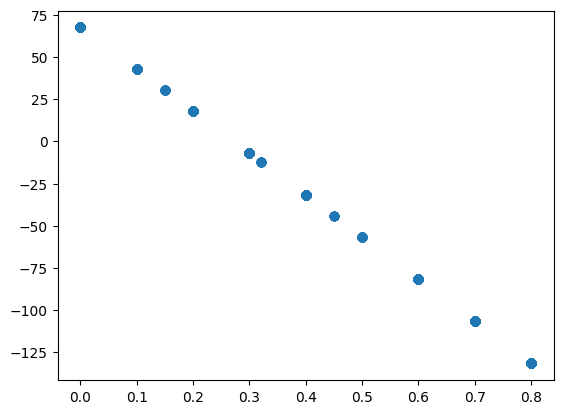

In [28]:
plt.scatter(trendline['Discount'],trendline['profit_trend_line'])